<h2>List of Examples</h2>

<h4>Discrete Gaussian $1$D</h4>

In [1]:
home=homedir();push!(LOAD_PATH,pwd());
using LinearAlgebra, PyPlot
using sfw,blasso,toolbox,certificate

In [2]:
# Model constants
sigmax=.05;K=50;
# Bounds of domain
bounds=[-1.0,1.0];
# Option solver
options=sfw.sfw_options();
# Load kernel attributes
kernel=blasso.setKernel(K,sigmax,bounds);
println(typeof(kernel))

blasso.gaussian


In [3]:
# Initial measure
a0=[0.8,0.8,0.8,0.8];
x0=[-.5,-.1,.1,.5];
# Noise
#srand(1);
w0=randn(K);
sigma=.01;
# Load operator Phi
op=blasso.setoperator(kernel,a0,x0,sigma*w0);

In [4]:
lambda=.5;
# Load objective function
fobj=blasso.setfobj(op,lambda);

In [5]:
@time result=sfw.sfw4blasso(fobj,kernel,op,options); # Solve problem

---------------------------------------
Iteration no 1 :
New Position : [0.0957868]
### Before BFGS ###
Amp/Pos : [0.812892, 0.0957868]
Energy : 132.8539618823446
### After BFGS ###
Amp/Pos : [0.812892, 0.0957865]
Energy : 132.85396188163332
---------------------------------------
Iteration no 2 :
New Position : [-0.100659]
### Before BFGS ###
Amp/Pos : [0.796148, 0.794037, 0.0957865, -0.100659]
Energy : 89.29773677629572
### After BFGS ###
Amp/Pos : [0.797089, 0.796648, 0.100013, -0.100014]
Energy : 89.14384450148037
---------------------------------------
Iteration no 3 :
New Position : [0.499955]
### Before BFGS ###
Amp/Pos : [0.797089, 0.796648, 0.795944, 0.100013, -0.100014, 0.499955]
Energy : 45.358754701586975
### After BFGS ###
Amp/Pos : [0.797089, 0.796648, 0.795944, 0.100012, -0.100014, 0.499954]
Energy : 45.358754700856124
---------------------------------------
Iteration no 4 :
New Position : [-0.499966]
### Before BFGS ###
Amp/Pos : [0.797089, 0.796648, 0.795944, 0.795719,

In [6]:
sfw.show_result(result, options)

###############################################
####### Solution of BLASSO in 4/20 iter! #######
###############################################
 - u         : [0.797089, 0.796648, 0.795944, 0.795719, 0.100012, -0.100014, 0.499954, -0.499966]
 - fobj      : 1.598419891379929
 - g         : [1.50542e-8, 1.64401e-8, -7.05436e-13, -2.3703e-8, 5.64037e-10, -4.13289e-8, -6.58559e-9, -2.93948e-7]
 - max(etaL) : [225.726, 220.416, 221.041, 220.979, 1.0]
 - f_converged : (tol 1.0e-15) : Bool[true, true, true, true]
 - u_converged : (tol 1.0e-14) : Bool[false, false, false, false]
 - g_converged :  (tol 1.0e-11) : Bool[false, false, false, false]
 - max lu iter hits : (max 10000) : Bool[false, false, false, false]
 - Nb iter local update          : [3, 12, 8, 9]
 - Warning newPos : [0, 0, 0, 0, 0]
 - Warning step   : [0, 0, 0, 0]


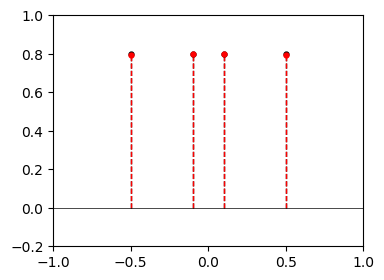

In [7]:
blasso.plotSpikes(vcat(a0,x0), result.u, op)

<h4>Dirichlet $1$D</h4>

In [8]:
# Model constants
fc=15;K=2fc+1;
# Option solver
options=sfw.sfw_options(show_mainIter=false,show_newPos=false);
# Load kernel attributes
kernel=blasso.setKernel(fc);
println(typeof(kernel))

blasso.dirichlet


In [9]:
# Initial measure
a0=[1.0,1.0,.1,.7,.8,.5,.5,.59,1.1,.3];
x0=[.2,.3,.35,.5,.7,.1,.13,.62,.77,.9];
# Noise
#srand(1);
w0=randn(K);
sigma=.01;
# Load operator Phi
op=blasso.setoperator(kernel,a0,x0,sigma*w0);

In [10]:
lambda=0.3;
# Load objective function
fobj=blasso.setfobj(op,lambda);

In [11]:
@time result=sfw.sfw4blasso(fobj,kernel,op,options); # Solve problem


SUCCEED! In 10 iterations.
  1.526158 seconds (2.82 M allocations: 184.340 MiB, 3.52% gc time)


In [12]:
sfw.show_result(result,options);

###############################################
####### Solution of BLASSO in 10/20 iter! #######
###############################################
 - u         : [1.0907, 0.985936, 0.988288, 0.79124, 0.499235, 0.691595, 0.582507, 0.290259, 0.472445, 0.0868108, 0.770034, 0.200228, 0.299826, 0.699915, 0.100776, 0.500024, 0.620057, 0.900171, 0.130054, 0.348777]
 - fobj      : 1.960662796341176
 - g         : [-1.9799e-8, 1.30525e-8, -1.19441e-9, -1.59246e-8, 6.05391e-8, -5.8492e-9, 7.68041e-9, -4.56125e-9, -5.91482e-8, 3.13481e-10, -2.4523e-8, -6.93186e-8, 2.65065e-8, 1.23489e-7, 3.16516e-7, 6.54799e-9, -9.044e-8, -1.40277e-6, 3.52031e-7, -4.36754e-7]
 - max(etaL) : [128.046, 100.798, 100.604, 91.1505, 71.1855, 67.095, 59.9201, 27.4523, 18.2291, 9.20888, 1.0]
 - f_converged : (tol 1.0e-15) : Bool[true, true, true, true, true, false, false, true, true, true]
 - u_converged : (tol 1.0e-14) : Bool[false, true, false, true, true, false, true, false, false, false]
 - g_converged :  (tol 1.0e-11

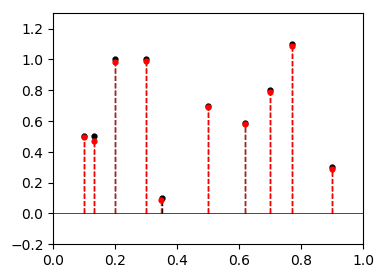

In [13]:
blasso.plotSpikes(vcat(a0,x0), result.u, op)

In [14]:
etaV=certificate.computeEtaV(x0,sign.(a0),op);
etaL,d1etaL,d2etaL=certificate.computeEtaL(result.u,op,lambda);

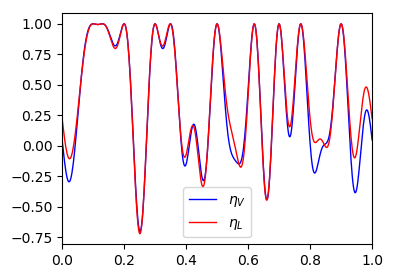

In [15]:
figure(figsize=(4,3))
tt=collect(range(0.0,stop=1.0,length=500));
plot(tt,map(etaV,tt),color="b",lw=1.0,label=L"$\eta_V$")
plot(tt,[etaL([tt[i]]) for i in 1:length(tt)],color="r",lw=1.0,label=L"$\eta_L$")
ax=gca();
ax[:set_xlim]([0.0,1.0]);
legend()
show()

<h4>Discritized normalized Laplace $1$D</h4>

In [16]:
bounds=zeros(2);bounds[1],bounds[2]=1e-4,.8;
K=5;
s=[0.0,.3,.8,10.0,25.0]; # discretization of s->e^{-sx}

a0=[1.0,1.0];
x0=[0.15,0.62];
u0=vcat(a0,x0);

kernel=blasso.setKernel(true,bounds,s); # Load kernel attributes
println(typeof(kernel))

options=sfw.sfw_options();

w0=randn(K);
sigma=0.001;
op=blasso.setoperator(kernel,a0,x0,sigma*w0); # Load operator Phi

blasso.dnlaplace


In [17]:
lambda=.1;
fobj=blasso.setfobj(op,lambda); # Load objective function
result=sfw.sfw4blasso(fobj,kernel,op,options); # Solve problem

---------------------------------------
Iteration no 1 :
New Position : [0.252354]
### Before BFGS ###
Amp/Pos : [2.97507, 0.252354]
Energy : 0.31088551965368655
### After BFGS ###
Amp/Pos : [2.97507, 0.252354]
Energy : 0.31088551965368655
---------------------------------------
Iteration no 2 :
New Position : [0.8]
### Before BFGS ###
Amp/Pos : [2.54595, 0.435486, 0.252354, 0.8]
Energy : 0.30813192203554846
### After BFGS ###
Amp/Pos : [1.71946, 1.2706, 0.16167, 0.626298]
Energy : 0.3041371009778896

SUCCEED! In 2 iterations.


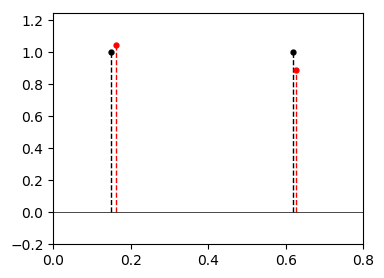

In [18]:
blasso.plotSpikes(vcat(a0,x0), result.u, op)

In [19]:
etaV=certificate.computeEtaV(x0,sign.(a0),op);
etaL,d1etaL,d2etaL=certificate.computeEtaL(result.u_mainIter[end],op,lambda);

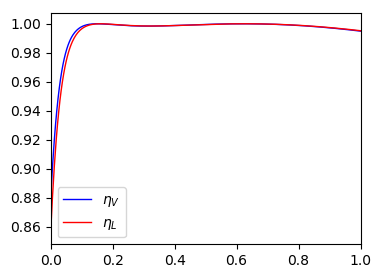

In [20]:
figure(figsize=(4,3))
tt=collect(range(0.0,stop=1.0,length=500));
plot(tt,map(etaV,tt),color="b",lw=1.0,label=L"$\eta_V$")
plot(tt,[etaL([tt[i]]) for i in 1:length(tt)],color="r",lw=1.0,label=L"$\eta_L$")
ax=gca();
ax[:set_xlim]([0.0,1.0]);
legend()
show()